In [2]:
import geopandas as  gpd
import pandas as pd
import numpy as np
import datetime
import glob
import matplotlib.pyplot as plt
# from rasterstats import zonal_stats

# Data srtructure

In [3]:
forecast = pd.DataFrame(columns=['date', "mean", "std"])

# WRF Primeras 72 HS

In [4]:
files_A = glob.glob('../data/cuencas/cuencas_CBA_A_*') 
files_B = glob.glob('../data/cuencas/cuencas_CBA_B_*') 
files_C = glob.glob('../data/cuencas/cuencas_CBA_C_*')
files_D = glob.glob('../data/cuencas/cuencas_CBA_D_*') 

In [5]:
c24A = pd.read_csv(files_A[0])
c48A = pd.read_csv(files_A[1])
c72A = pd.read_csv(files_A[2])
c24B = pd.read_csv(files_B[0])
c48B = pd.read_csv(files_B[1])
c72B = pd.read_csv(files_B[2])
c24C = pd.read_csv(files_C[0])
c48C = pd.read_csv(files_C[1])
c72C = pd.read_csv(files_C[2])
c24D = pd.read_csv(files_D[0])
c48D = pd.read_csv(files_D[1])
c72D = pd.read_csv(files_D[2])

In [6]:
mA24 = c24A.loc[c24A.index == 49]['mean']
mA48 = c48A.loc[c48A.index == 49]['mean']
mA72 = c72A.loc[c72A.index == 49]['mean']
mB24 = c24B.loc[c24B.index == 49]['mean']
mB48 = c48B.loc[c48B.index == 49]['mean']
mB72 = c72B.loc[c72B.index == 49]['mean']
mC24 = c24C.loc[c24C.index == 49]['mean']
mC48 = c48C.loc[c48C.index == 49]['mean']
mC72 = c72C.loc[c72C.index == 49]['mean']
mD24 = c24D.loc[c24D.index == 49]['mean']
mD48 = c48D.loc[c48D.index == 49]['mean']
mD72 = c72D.loc[c72D.index == 49]['mean']

In [7]:
m24 = pd.concat([mA24, mB24, mC24, mD24], ignore_index=True)
m48 = pd.concat([mA48, mB48, mC48, mD48], ignore_index=True)
m72 = pd.concat([mA72, mB72, mC72, mD72], ignore_index=True)

In [8]:
date = datetime.datetime.strptime("2021-02-23", "%Y-%m-%d")
mean = m24.mean()
std = m24.std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [9]:
forecast = forecast.append(temp)

In [10]:
date = datetime.datetime.strptime("2021-02-24", "%Y-%m-%d")
mean = (m48 - m24).mean()
std = (m48 - m24).std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [11]:
forecast = forecast.append(temp)

In [12]:
date = datetime.datetime.strptime("2021-02-25", "%Y-%m-%d")
mean = (m72 - m24).mean()
std = (m72 - m24).std()
temp = pd.DataFrame(data = {'date': [date], "mean": [mean], "std":[std]})

In [13]:
forecast = forecast.append(temp)

In [14]:
forecast

,date,mean,std
0,2021-02-23,0.04,0.08
0,2021-02-24,0.00,0.00
0,2021-02-25,0.00,0.00


In [15]:
dateA = datetime.datetime.strptime("2021-02-23", "%Y-%m-%d")
dateB = datetime.datetime.strptime("2021-02-24", "%Y-%m-%d")
dateC = datetime.datetime.strptime("2021-02-25", "%Y-%m-%d")

In [16]:
date = pd.DataFrame({'date': [dateA, dateB, dateC]})

# preparar para integrar

In [17]:
wrf = pd.DataFrame({'wrfA':[mA24.values[0], mA48.values[0] - mA48.values[0], mA72.values[0] - mA48.values[0]],
              'wrfB':[mB24.values[0], mB48.values[0] - mB48.values[0], mB72.values[0] - mB48.values[0]],
              'wrfC':[mC24.values[0], mC48.values[0] - mC48.values[0], mC72.values[0] - mC48.values[0]],
              'wrfD':[mD24.values[0], mD48.values[0] - mD48.values[0], mD72.values[0] - mD48.values[0]]})

In [18]:
wrf['date'] = date['date']


In [19]:
wrf

,wrfA,wrfB,wrfC,wrfD,date
0,0.16,0.0,0.0,0.0,2021-02-23
1,0.00,0.0,0.0,0.0,2021-02-24
2,0.00,0.0,0.0,0.0,2021-02-25


# DÍA 4 A 16

## GFS

In [35]:
filelist = glob.glob("../data/csv/GFS_*_ppm_all_day.csv")

In [36]:
len(filelist)

1

In [37]:
gfs = pd.read_csv(filelist[0])

In [38]:
gfs.head()

,date,mean
0,2021-02-23,1.145190
1,2021-02-24,1.891049
2,2021-02-25,1.891049
3,2021-02-26,1.891049
4,2021-02-27,2.768519


## GEFS

In [39]:
filelist = glob.glob("../data/csv/GEFS_*_ppm_all_day.csv")

In [40]:
len(filelist)

30

In [41]:
list_of_df = []
full_df = pd.DataFrame()
for file in range(30):
    # vars()[str(file)] = pd.read_csv(filelist[file])
    # vars()[] = pd.read_csv(file)
    vars()[f"gefs{file}"] = pd.read_csv(filelist[file])
    full_df[f"gefs{file}"] = vars()[f"gefs{file}"]['mean']

In [42]:
full_df.head(2)

,gefs0,gefs1,gefs2,gefs3,gefs4,gefs5,gefs6,gefs7,gefs8,gefs9,...,gefs20,gefs21,gefs22,gefs23,gefs24,gefs25,gefs26,gefs27,gefs28,gefs29
0,0.753683,0.015041,0.319568,1.278210,0.004488,0.140990,0.074979,0.072613,0.029136,1.690002,...,0.574578,0.312222,0.065185,0.533881,1.014959,0.392554,0.339465,0.575720,0.074239,0.000988
1,0.016975,0.000000,0.034136,0.515165,0.000000,0.122506,0.021605,0.000000,0.000000,0.001833,...,0.122963,0.000988,0.000000,0.755012,0.000000,0.000000,0.000000,0.035864,0.000000,0.000988


In [43]:
forecastGEFS = pd.DataFrame()

In [44]:
for key in range(30):
    mean = full_df.iloc[key].mean()
    std = full_df.iloc[key].std()
    temp = pd.DataFrame(data={"mean": [mean], "std": [std]}, dtype=np.float32)
    forecastGEFS = forecastGEFS.append(temp, ignore_index=True)

In [45]:
forecastGEFS['date'] = gefs0['date']

In [46]:
forecastGEFS['date'] = pd.to_datetime(forecastGEFS['date'])

In [47]:
forecastGEFS.head(2)

,mean,std,date
0,0.579754,0.739791,2021-02-23
1,0.074257,0.179125,2021-02-24


### Prueba de mezclar GEFS y GFS y WRF

In [48]:
full_df['gfs'] = gfs['mean']
full_df['wrfA'] = wrf['wrfA']
full_df['wrfB'] = wrf['wrfB']
full_df['wrfC'] = wrf['wrfC']
full_df['wrfD'] = wrf['wrfD']

In [49]:
full_df.head(6)

,gefs0,gefs1,gefs2,gefs3,gefs4,gefs5,gefs6,gefs7,gefs8,gefs9,...,gefs25,gefs26,gefs27,gefs28,gefs29,gfs,wrfA,wrfB,wrfC,wrfD
0,0.753683,0.015041,0.319568,1.278210,0.004488,0.140990,0.074979,0.072613,0.029136,1.690002,...,0.392554,0.339465,0.575720,0.074239,0.000988,1.145190,0.16,0.0,0.0,0.0
1,0.016975,0.000000,0.034136,0.515165,0.000000,0.122506,0.021605,0.000000,0.000000,0.001833,...,0.000000,0.000000,0.035864,0.000000,0.000988,1.891049,0.00,0.0,0.0,0.0
2,0.000049,0.000346,0.000000,0.003951,0.001481,0.023893,0.000494,0.000000,0.000000,0.000000,...,0.000988,0.000000,0.001531,0.000000,0.000494,1.891049,0.00,0.0,0.0,0.0
3,0.000000,1.728128,0.000000,0.000000,0.000000,0.008971,0.001481,0.000000,0.000000,0.000000,...,0.000494,0.000000,0.000000,0.000000,0.013909,1.891049,NaN,NaN,NaN,NaN
4,3.194961,6.958521,0.232531,0.021374,12.682381,2.940753,1.168726,0.000988,0.000494,0.900049,...,1.846414,0.557037,0.086358,0.000000,6.042914,2.768519,NaN,NaN,NaN,NaN
5,0.225761,5.122568,4.284259,0.187531,0.294198,2.500576,7.763889,0.000000,0.055802,1.800385,...,0.521255,19.451893,0.151543,0.000000,5.495638,8.272865,NaN,NaN,NaN,NaN


In [150]:
forecastGEFS2 = pd.DataFrame()
for key in range(30):
    mean = full_df.iloc[key].mean()
    std = full_df.iloc[key].std()
    median = full_df.iloc[key].median()
    temp = pd.DataFrame(data={"mean": [mean], "std": [std], "median": [median]}, dtype=np.float32)
    forecastGEFS2 = forecastGEFS2.append(temp, ignore_index=True)

In [151]:
forecastGEFS2['date'] = gefs0['date']
forecastGEFS2['date'] = pd.to_datetime(forecastGEFS2['date'])
# forecastGEFS2.set_index('date')

In [152]:
forecastGEFS2["max"] = forecastGEFS2["mean"] + forecastGEFS2["std"]
forecastGEFS2["min"] = forecastGEFS2["mean"] - forecastGEFS2["std"]

In [153]:
forecastGEFS2.loc[forecastGEFS2["min"] < 0, "min"] = 0

In [120]:
forecastGEFS2 = forecastGEFS2.set_index('date')

In [115]:
forecastGEFS2.head()

,mean,std,median,date,max,min
0,0.534223,0.713383,0.312222,2021-02-23,1.247606,0.0
1,0.117679,0.350935,0.000988,2021-02-24,0.468614,0.0
2,0.060023,0.319600,0.000000,2021-02-25,0.379624,0.0
3,0.145143,0.462449,0.000000,2021-02-26,0.607592,0.0
4,2.302893,3.148221,0.900049,2021-02-27,5.451113,0.0


In [88]:
forecastGEFS2.iloc[1]['mean']

0.11767872

In [156]:
temp =  pd.DataFrame(columns=['accum'])
for key, item in forecastGEFS2.iterrows():
    key1 = key - 1 # datetime.timedelta(days=1)
    if key == 0:
        temp = temp.append({'accum': forecastGEFS2.iloc[key]['mean']}, ignore_index=True) 
    else:
        temp = temp.append({'accum': temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']}, ignore_index=True)
        # temp.iloc[key]['accum'] = temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']
    


In [190]:
(key - datetime.timedelta(days=1)).strptime

Timestamp('2021-02-22 00:00:00')

In [154]:
tempmed =  pd.DataFrame(columns=['accummed'])
for key, item in forecastGEFS2.iterrows():
    key1 = key - 1 # datetime.timedelta(days=1)
    #print(item)
    if key == 0:
        tempmed = tempmed.append({'accummed': forecastGEFS2.iloc[key]['median']}, ignore_index=True) 
    else:
        tempmed = tempmed.append({'accummed': tempmed.iloc[key1]['accummed'] + forecastGEFS2.iloc[key]['median']}, ignore_index=True)
        # temp.iloc[key]['accum'] = temp.iloc[key1]['accum'] + forecastGEFS2.iloc[key]['mean']

In [157]:
temp['accmin'] = temp['accum'] - forecastGEFS2['std']
temp['accmax'] = temp['accum'] + forecastGEFS2['std']

In [158]:
temp['date'] = forecastGEFS['date']

In [163]:
tempmed['date'] = forecastGEFS['date']

In [105]:
temp.loc[temp['accmin'] < 0, 'accmin'] = 0

In [106]:
temp

,accum,accmin,accmax,date
0,0.000000,0.000000,0.713383,2021-02-23
1,0.651902,0.300966,1.002837,2021-02-24
2,0.711925,0.392325,1.031525,2021-02-25
3,0.857068,0.394618,1.319517,2021-02-26
4,3.159960,0.011740,6.308181,2021-02-27
5,6.298268,1.976743,10.619794,2021-02-28
6,14.783812,2.207454,27.360170,2021-03-01
7,23.470040,6.846900,40.093181,2021-03-02
8,27.554234,16.070509,39.037958,2021-03-03
9,32.226789,24.924178,39.529400,2021-03-04


In [71]:
temp = temp.set_index("date")
forecastGEFS2 = forecastGEFS2.set_index('date')

In [168]:
#temp = temp.set_index("date")
tempmed = tempmed.set_index("date")

## PLOT

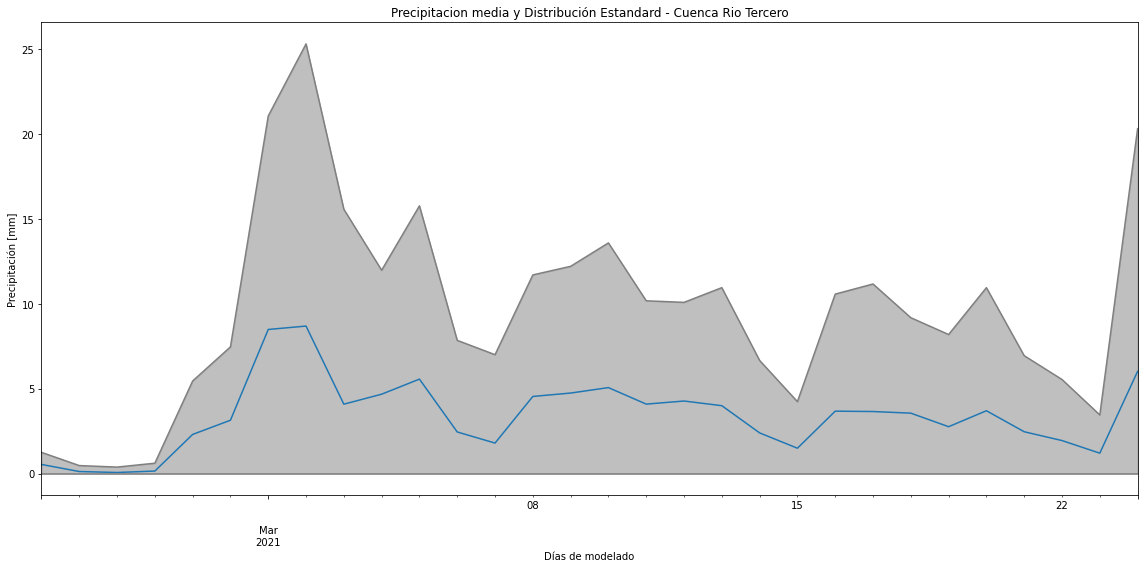

In [121]:
fig, ax = plt.subplots( 1, 1, figsize=(16,8) )
forecastGEFS2['mean'].plot(ax=ax)
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )
ax.fill_between(x = forecastGEFS2.index, y1=forecastGEFS2['max'], y2=forecastGEFS2['min'], color='gray', alpha=0.5)
ax.set_title("Precipitacion media y Distribución Estandard - Cuenca Rio Tercero")
ax.errorbar(forecastGEFS2.index, forecastGEFS2['max'], color='grey')
ax.errorbar(forecastGEFS2.index, forecastGEFS2['min'], color='grey')
plt.xlabel("Días de modelado")
plt.ylabel("Precipitación [mm]")
plt.tight_layout()

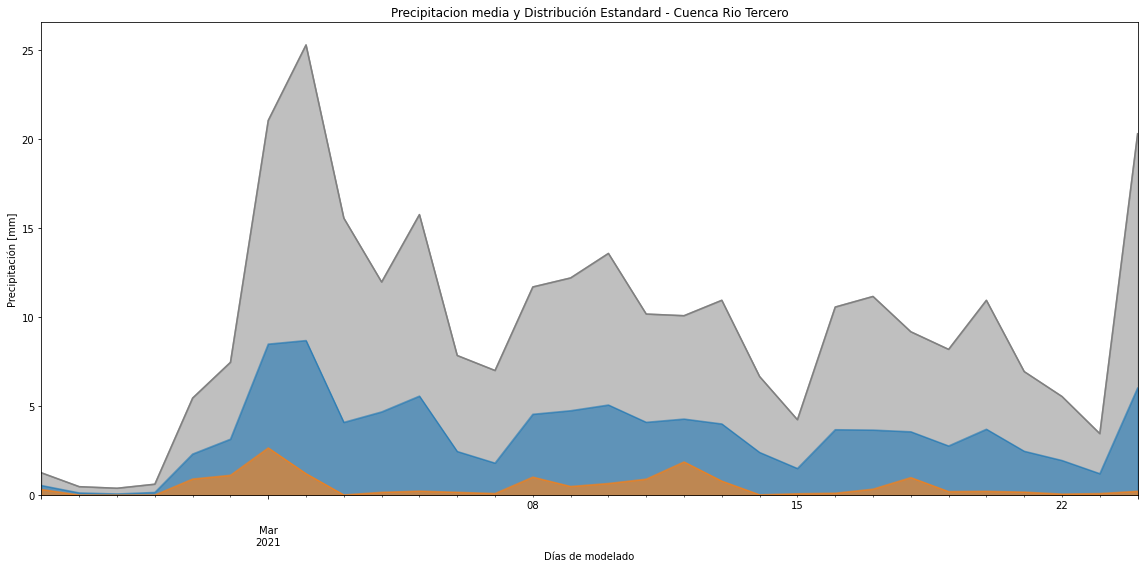

In [132]:
fig, ax = plt.subplots( 1, 1, figsize=(16,8) )
forecastGEFS2['max'].plot.area(ax=ax, color='grey', alpha=0.5)
forecastGEFS2['mean'].plot.area(ax=ax, alpha=0.6)
forecastGEFS2['median'].plot.area(ax=ax, alpha=0.6)
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )
#ax.fill_between(x = forecastGEFS2.index, y1=forecastGEFS2['max'], y2=forecastGEFS2['min'], color='gray', alpha=0.5)
ax.set_title("Precipitacion media y Distribución Estandard - Cuenca Rio Tercero")
ax.errorbar(forecastGEFS2.index, forecastGEFS2['max'], color='grey')
#ax.errorbar(forecastGEFS2.index, forecastGEFS2['min'], color='grey')
plt.xlabel("Días de modelado")
plt.ylabel("Precipitación [mm]")
plt.tight_layout()

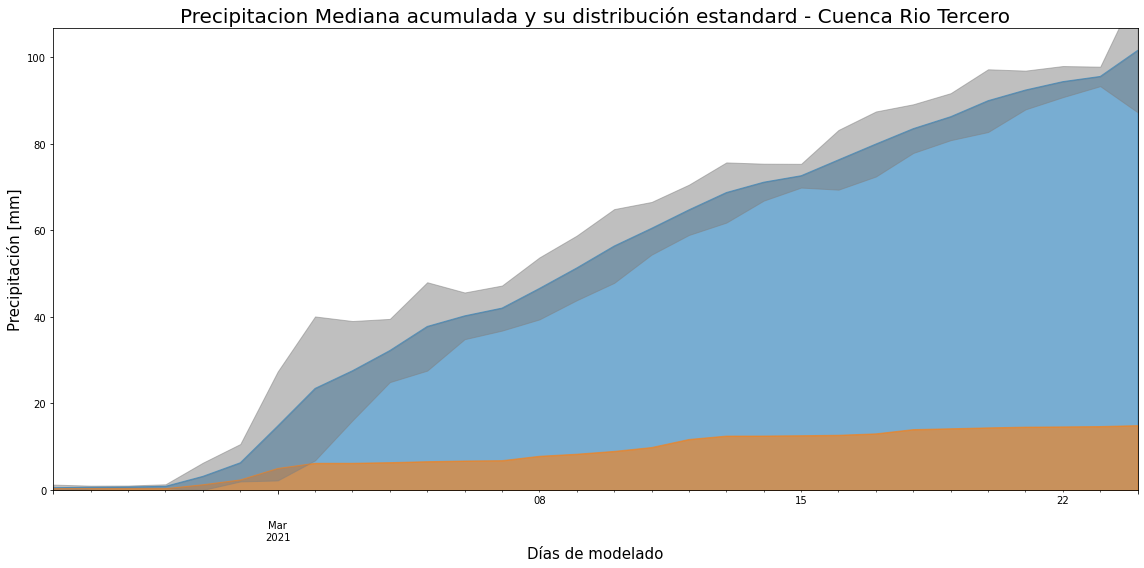

In [170]:
fig, ax = plt.subplots( 1, 1, figsize=(16,8) )
temp['accum'].plot.area(ax=ax, linewidth=1, alpha=0.6)
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )

tempmed['accummed'].plot.area(ax=ax, linewidth=1, alpha=0.6)
ax.fill_between(x = temp.index, y1=temp['accmin'], y2=temp['accmax'], color='gray', alpha=0.5)
ax.set_title("Precipitacion Mediana acumulada y su distribución estandard - Cuenca Rio Tercero", fontsize=20)
plt.xlabel("Días de modelado", fontsize=15)
plt.ylabel("Precipitación [mm]", fontsize=15)
plt.tight_layout()

In [167]:
tempmed['date'] = temp['date']

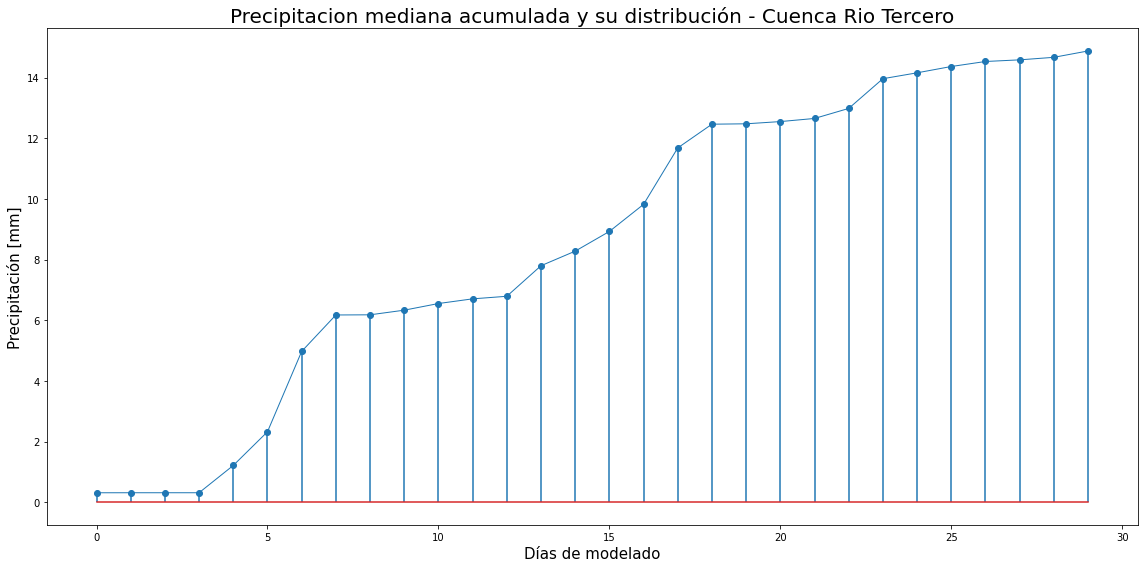

In [141]:
fig, ax = plt.subplots( 1, 1, figsize=(16,8) )
tempmed['accummed'].plot(ax=ax, linewidth=1)
#ax.plot(forecastGEFS2['mean'], color='blue', linewidth=2 )
ax.stem(temp.index, tempmed['accummed'])
# ax.fill_between(x = temp.index, y1=temp['accmin'], y2=temp['accmax'], color='gray', alpha=0.5)
ax.set_title("Precipitacion mediana acumulada y su distribución - Cuenca Rio Tercero", fontsize=20)
plt.xlabel("Días de modelado", fontsize=15)
plt.ylabel("Precipitación [mm]", fontsize=15)
plt.tight_layout()